In [6]:
import spacy

nlp = spacy.blank("en")

doc = nlp("Captain america ate 100$ of lechon. Then he said I can do this all day.")

for token in doc:
    print(token)

Captain
america
ate
100
$
of
lechon
.
Then
he
said
I
can
do
this
all
day
.


### Below is an illustration of a blank spacy pipeline

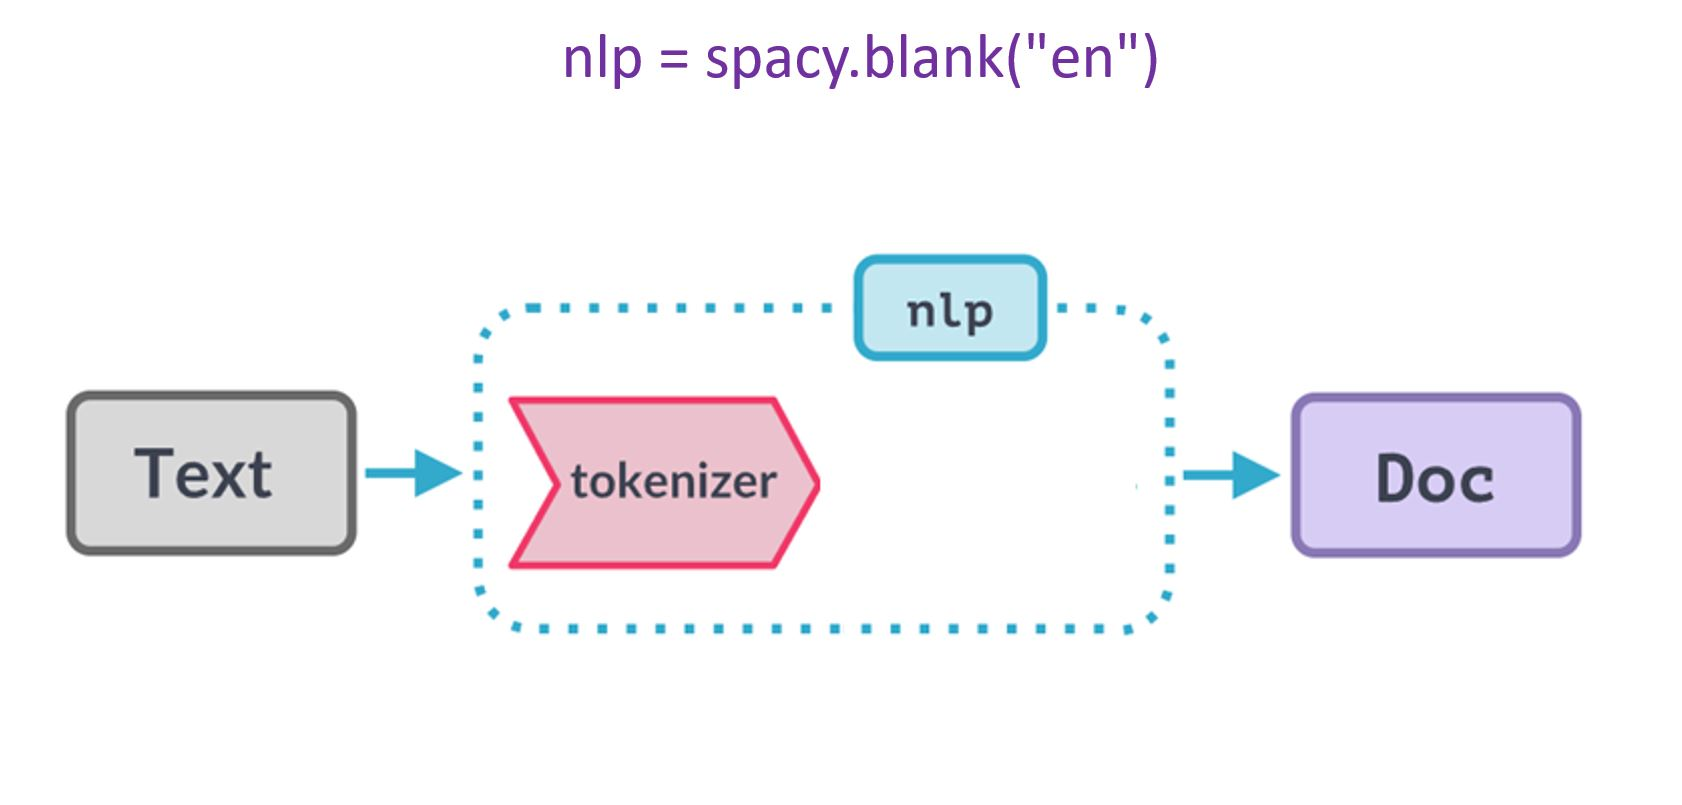

In [7]:
nlp.pipeline

[]

In [8]:
# use terminal to download en_core_web_sm and the command below
# python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [9]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x119ad6c30>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x119ad5610>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1192bab20>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x119657f50>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x1194f5650>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1192ba7a0>)]

### spaCy NLP pipeline

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.

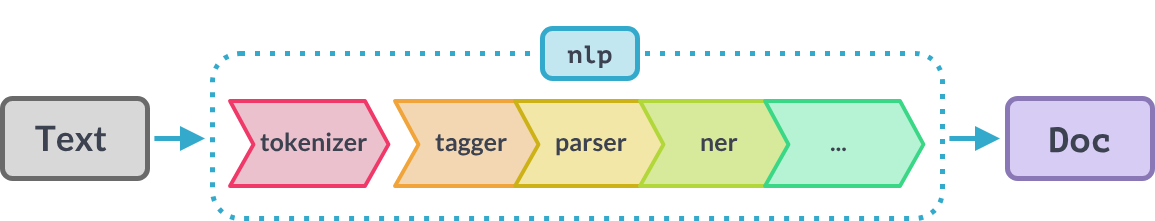

In [11]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [10]:
doc = nlp("Captain america ate 100$ of lechon. Then he said I can do this all day.")

for token in doc:
    print(token, " | ", spacy.explain(token.pos_), " | ", token.lemma_)

Captain  |  proper noun  |  Captain
america  |  proper noun  |  america
ate  |  verb  |  eat
100  |  numeral  |  100
$  |  numeral  |  $
of  |  adposition  |  of
lechon  |  noun  |  lechon
.  |  punctuation  |  .
Then  |  adverb  |  then
he  |  pronoun  |  he
said  |  verb  |  say
I  |  pronoun  |  I
can  |  auxiliary  |  can
do  |  verb  |  do
this  |  pronoun  |  this
all  |  determiner  |  all
day  |  noun  |  day
.  |  punctuation  |  .


## Name Entity Recognition (NER) in SpaCy
```
spacy.explain(ent.label_)
```
### NER labels
* PERSON:      People, including fictional.
* NORP:        Nationalities or religious or political groups.
* FAC:         Buildings, airports, highways, bridges, etc.
* ORG:         Companies, agencies, institutions, etc.
* GPE:         Countries, cities, states.
* LOC:         Non-GPE locations, mountain ranges, bodies of water.
* PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
* EVENT:       Named hurricanes, battles, wars, sports events, etc.
* WORK_OF_ART: Titles of books, songs, etc.
* LAW:         Named documents made into laws.
* LANGUAGE:    Any named language.
* DATE:        Absolute or relative dates or periods.
* TIME:        Times smaller than a day.
* PERCENT:     Percentage, including ”%“.
* MONEY:       Monetary values, including unit.
* QUANTITY:    Measurements, as of weight or distance.
* ORDINAL:     “first”, “second”, etc.
* CARDINAL:    Numerals that do not fall under another type.

In [14]:
doc = nlp("Tesla Inc is going to acquire OpenAI from Microsoft for $50 billion")
for ent in doc.ents:
    print(ent.text, "|", ent.label_)

Tesla Inc | ORG | Companies, agencies, institutions, etc.
OpenAI | GPE | Countries, cities, states
Microsoft | ORG | Companies, agencies, institutions, etc.
$50 billion | MONEY | Monetary values, including unit


In [15]:
from spacy import displacy

displacy.render(doc, style="ent")

### Adding component to a Blank pipeline

In [16]:
source_nlp = spacy.load("en_core_web_sm")

nlp = spacy.blank("en")
nlp.add_pipe("ner", source=source_nlp)
nlp.pipe_names

['ner']

In [17]:
doc = nlp("Apple Inc is going to acquire Microsoft for $500 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple Inc ORG
Microsoft ORG
$500 billion MONEY
